In [1]:
%matplotlib inline

In [2]:
import scipy as sp
import scipy.interpolate
import numpy as np
import glob #to read the files
from sklearn.decomposition import PCA
from ipywidgets import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import scipy.interpolate as interp
%matplotlib notebook

In [3]:
x = np.linspace(-20,50,71)
y = np.linspace(2000,9200,721)

In [4]:
sn_names=glob.glob("*.dat")
print(len(sn_names))

85


In [6]:
X = []

In [7]:
for k in range(0,1):
    
    file = open(sn_names[k])
    lines = file.readlines()
    file.close()

    xtemp = []

    for line in lines:

        if line.startswith('#'): continue
        co=line.rstrip().replace('INDEF','Nan').split()

        xtemp.append(co[0])

    xtemp = np.array(xtemp, dtype=float)

    z = np.reshape(xtemp, (721, 71))

    zz = []
    xx = []
    yy = []

    for i in range(0,len(y)):

        for j in range(0,len(x)):

            if 0<x[j]<30 and 4000<y[i]<7500:

                if z[i][j] != 0:
                
                    zz.append(z[i][j])
                    xx.append(x[j])
                    yy.append(y[i])
                    
                    
                    
    if len(zz)>0:
        
        ninepos =  [jj for jj, e in enumerate(zz) if e == 0]
        
        if len(ninepos) < .1*len(zz):
        
            X.append(np.asarray(zz))

# Superficies originais

In [13]:
x_grid = np.linspace(0,30,31)
y_grid = np.linspace(4000,7000,500)
B1, B2 = np.meshgrid(x_grid, y_grid, indexing='xy')

<IPython.core.display.Javascript object>


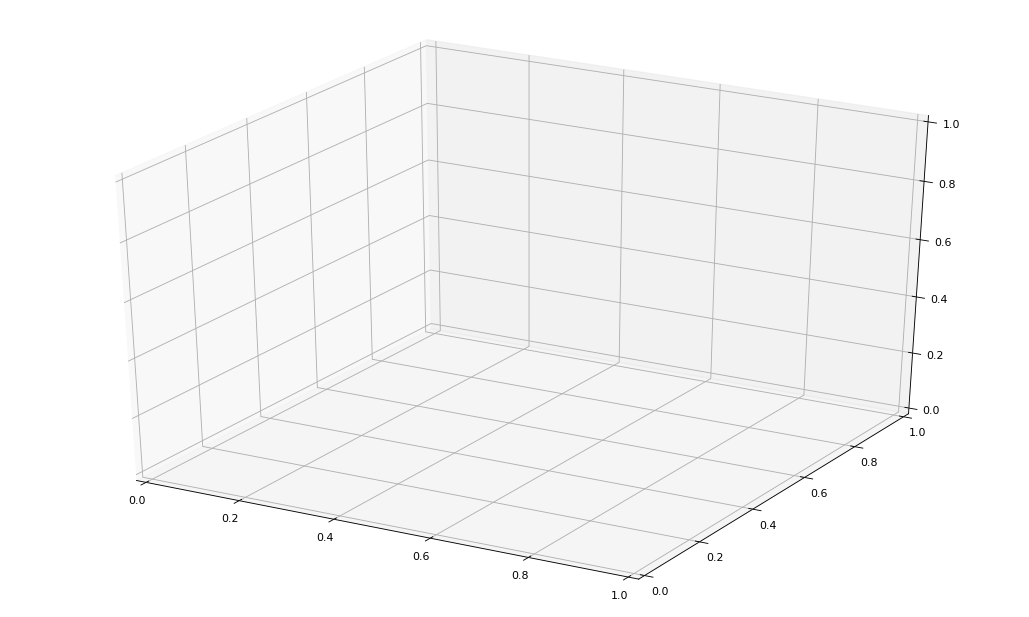

interactive(children=(Dropdown(description='Superficie:', options=(1,), value=1), Output()), _dom_classes=('wi…

In [ ]:
%matplotlib notebook

fig = plt.figure(figsize=(13,7.8))
ax = axes3d.Axes3D(fig)

def update_graph(i):
    
    ax.clear()
    
    Z = sp.interpolate.Rbf(xx,yy,zz,function='thin_plate',smooth=5, episilon=5)

    #Z = splinemean(B1, B2)

    ax.plot_wireframe(B1, B2, Z)
    ax.plot_surface(B1, B2, Z,alpha=0.2)
    ax.scatter3D(xx,yy,zz, c='r')
    plt.show()
    
    


i = widgets.Dropdown(options=[1], value=1, description='Superficie:', disabled=False)

widgets.interactive(update_graph,i = i)